## Regresión Lineal: Costo de un Incidente de Seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

### Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

#### 1.-Generación del conjunto de datos

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)
print("La longitud del conjunto de datos es: ", len(X))

La longitud del conjunto de datos es:  100


#### 2.-Visualización del conjunto de datos

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

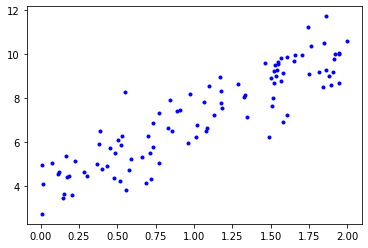

In [5]:
plt.plot(X, Y, "b.")
plt.show()

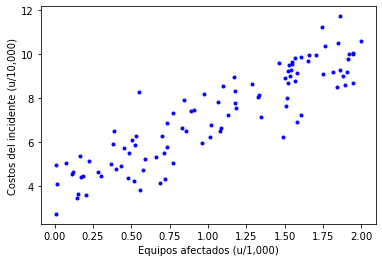

In [18]:
plt.plot(X, Y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costos del incidente (u/10,000)")
plt.show()

### 3.-Modificación del conjunto de datos

In [7]:
import pandas as pd

In [9]:
data = {'No_Equipos_Afectados' : X.flatten(), 'Costo' : Y.flatten()}
df = pd.DataFrame(data)
df.head(20)

,No_Equipos_Afectados,Costo
0,0.735432,5.794533
1,1.747230,11.256581
2,1.571083,9.832845
3,0.772511,5.072764
4,0.013962,4.119058
5,1.753742,9.098785
6,0.121469,4.649929
7,0.153240,3.672225
8,1.860545,9.272847
9,0.145642,3.489242


In [10]:
# Escalado del número de equipos afectados
df["No_Equipos_Afectados"] = df["No_Equipos_Afectados"] * 1000
df["No_Equipos_Afectados"] = df["No_Equipos_Afectados"].astype('int')
# Escalado del costo
df["Costo"] = df["Costo"] * 10000
df["Costo"] = df["Costo"].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,735,57945
1,1747,112565
2,1571,98328
3,772,50727
4,13,41190
5,1753,90987
6,121,46499
7,153,36722
8,1860,92728
9,145,34892


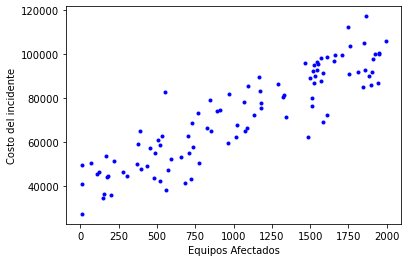

In [11]:
# Representación gráfica del conjunto de datos
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

### 4.-Construcción del Modelo

In [13]:
from sklearn.linear_model import LinearRegression

In [15]:
# Construcción del modelo y ajuste de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df["No_Equipos_Afectados"].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [19]:
# Parámetro Theta 0
lin_reg.intercept_

38907.29072237572

In [20]:
# Parámetro Theta 1
lin_reg.coef_

array([31.69593751])

In [21]:
# Predicción para el valor mínimo y Máximo de datos de entrenamiento
X_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df["No_Equipos_Afectados"].max()]])
Y_train_pred = lin_reg.predict(X_min_max)

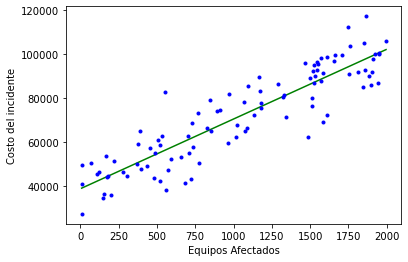

In [23]:
# Representación gráfica de la función de Hipótesis generada
plt.plot(X_min_max, Y_train_pred, "g-")
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

### 5.-Predicción de nuevos ejemplos

In [28]:
x_new = np.array([[2500]]) # 1300 equipos afectados

#La predicción del costo que tendría el incidente
costo = lin_reg.predict(x_new)

print("El costo del incidente sería: $", int(costo[0]))


El costo del incidente sería: $ 118147


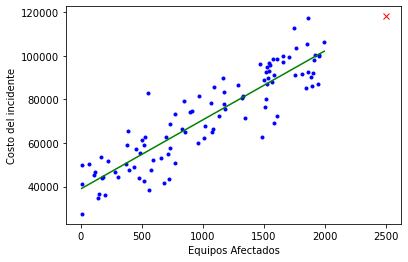

In [29]:
plt.plot(df["No_Equipos_Afectados"], df["Costo"], "b.")
plt.plot(X_min_max, Y_train_pred, "g-")
plt.plot(x_new, costo, "rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()